**Loading the dataset**

In [4]:
import pandas as pd
# Load the dataset
data = pd.read_csv('Housing.csv')


**Encoding Categorical Variables**

In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Separate the numeric and categorical columns
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Encoding for categorical columns
label_encoder = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(label_encoder.fit_transform)

# Print the first 5 rows of the dataset
print("First 5 rows of the dataset:")
data.head(5)

First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [65]:
# Print the data types of the dataset
print("\nData types of the dataset:")
print(data.info())



Data types of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None


**Feature Selection**

In [66]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the features (X) and the target variable (y)
X = data.drop('price', axis=1)  # Exclude the target variable from features
y = data['price']

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=9)  # Select top 9 features
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Create a DataFrame with the selected features
selected_features_df = pd.DataFrame({'Selected Features': selected_features})

# Display the selected features in table format
print("Selected Features:")
print(selected_features_df)


Selected Features:
  Selected Features
0              area
1          bedrooms
2         bathrooms
3           stories
4          mainroad
5   airconditioning
6           parking
7          prefarea
8  furnishingstatus


The above code performs feature selection using the SelectKBest method from scikit-learn, which selects the top 9 features based on their correlation with the target variable using the f_regression scoring function.

**Machine Learning Models and Evaluating their Performance on all Features**

The below code performs cross-validation using 10 folds to train and test the 3 machine learning models. The evaluation metrics (MAE, MSE, RMSE) are calculated using the negative scoring approach. By taking the negative of the scores, lower values indicate better performance for these metrics.

The average of the negative scores is then taken to compute the actual values of the evaluation metrics (MAE, MSE, RMSE). These metrics provide insights into the model's accuracy and performance.

The code also calculates the R-squared (R2) coefficient using the r2_score function. R2 represents the proportion of variance in the target variable explained by the model. A higher R2 value (closer to 1) indicates a better fit of the model to the data.

Additionally, cross_val_predict is used to obtain the predicted values for each fold during cross-validation. These predicted values, along with the actual values, are then used to create a scatter plot with the fitted line using plt.scatter and plt.plot functions. This allows visualizing the relationship between the actual and predicted values and assessing the performance of the model visually.

**1. Linear Regression Model**

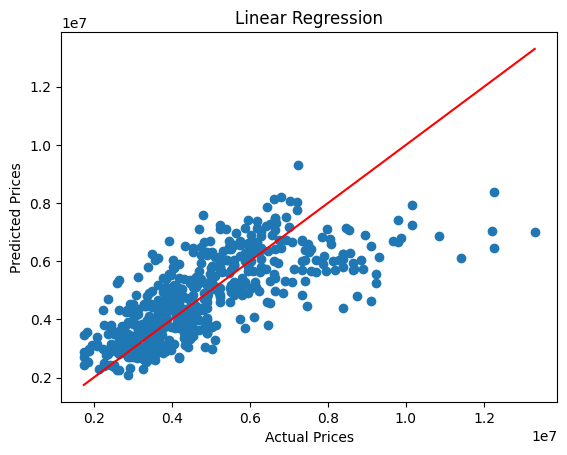

Mean Absolute Error (MAE): 923752.22
Mean Squared Error (MSE): 1611590237884.42
Root Mean Squared Error (RMSE): 1125761.78
R-squared coefficient (R2): 0.54


In [67]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X = data.drop('price', axis=1)  # Independent variables
y = data['price']   # Dependent variable

# Create the Linear Regression model
model = LinearRegression()

# Perform cross-validation and obtain the predicted values
predicted = cross_val_predict(model, X, y, cv=10)

# Evaluate the model performance using cross_val_score
mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
R2_score = r2_score(y, predicted)

# Compute the average of the evaluation metrics
mae = np.mean(mae_scores)
mse = np.mean(mse_scores)
rmse = np.mean(rmse_scores)

# Plot the scatter plot with the fitted line
plt.scatter(y, predicted)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Fitted line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression')
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared coefficient (R2):", round(R2_score, 2))


The linear regression model, lower values of MAE, MSE, and RMSE indicate better performance. The MAE of 923,752.22 indicates that, on average, the model's predictions deviate from the actual values by approximately 923,752.22. The RMSE of 1,125,761.78 indicates the average prediction error of the model is around 1,125,761.78. The R-squared coefficient of 0.54 indicates that approximately 54% of the variability in the target variable can be explained by the linear regression model.

**2. Decision Tree Regression Model**

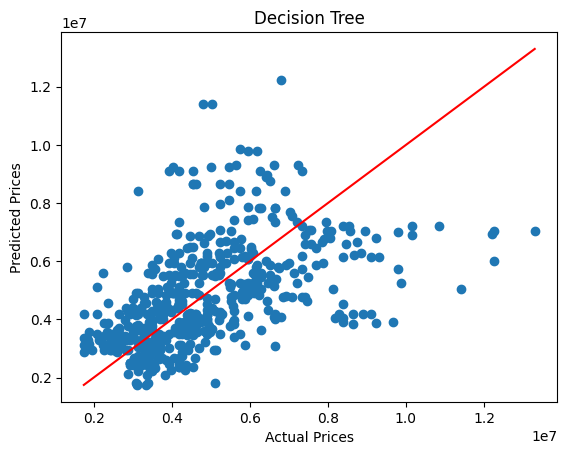

Mean Absolute Error (MAE): 1329384.34
Mean Squared Error (MSE): 3162201671324.56
Root Mean Squared Error (RMSE): 1681132.93
R-squared coefficient (R2): 0.09


In [68]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X = data.drop('price', axis=1)  # Independent variables
y = data['price']   # Dependent variable

# Create the Decision Tree Regression model
model = DecisionTreeRegressor()

# Perform cross-validation and obtain the predicted values
predicted = cross_val_predict(model, X, y, cv=10)

# Evaluate the model performance using cross_val_score
mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
R2_score = r2_score(y, predicted)

# Compute the average of the evaluation metrics
mae = np.mean(mae_scores)
mse = np.mean(mse_scores)
rmse = np.mean(rmse_scores)

# Plot the scatter plot with the fitted line
plt.scatter(y, predicted)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Fitted line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree')
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared coefficient (R2):", round(R2_score, 2))


The decison tree regression model has higher MAE, MSE, and RMSE values compared to linear regression indicate that the decision tree model's predictions have higher errors. The R-squared coefficient of 0.09 suggests that only approximately 9% of the variability in the target variable is explained by the decision tree model.

**3. Random Forest Model**

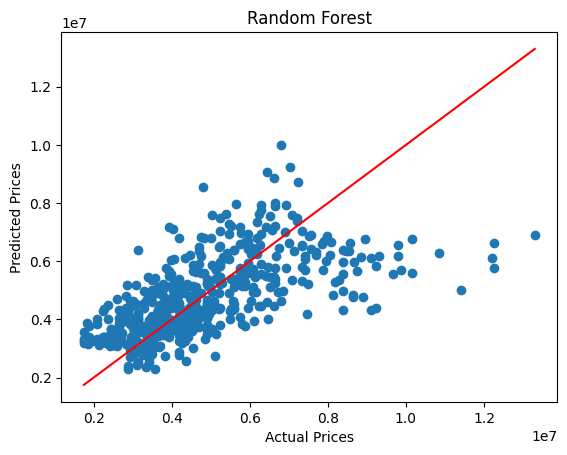

Mean Absolute Error (MAE): 1053001.02
Mean Squared Error (MSE): 2105179659048.42
Root Mean Squared Error (RMSE): 1275150.67
R-squared coefficient (R2): 0.4


In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X = data.drop('price', axis=1)  # Independent variables
y = data['price']   # Dependent variable

# Create the Decision Tree Regression model
model = RandomForestRegressor()

# Perform cross-validation and obtain the predicted values
predicted = cross_val_predict(model, X, y, cv=10)

# Evaluate the model performance using cross_val_score
mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
R2_score = r2_score(y, predicted)

# Compute the average of the evaluation metrics
mae = np.mean(mae_scores)
mse = np.mean(mse_scores)
rmse = np.mean(rmse_scores)

# Plot the scatter plot with the fitted line
plt.scatter(y, predicted)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Fitted line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest')
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared coefficient (R2):", round(R2_score, 2))


The Random Forest model MAE and RMSE values are lower compared to the decision tree, indicating that the random forest model performs better in terms of prediction accuracy as compare to decison tree. The R-squared coefficient of 0.4 suggests that approximately 40% of the variability in the target variable can be explained by the random forest model.

**Machine Learning Models and Evaluating their Performance on Selected Features**

**1. Linear Regression Model on selected features**

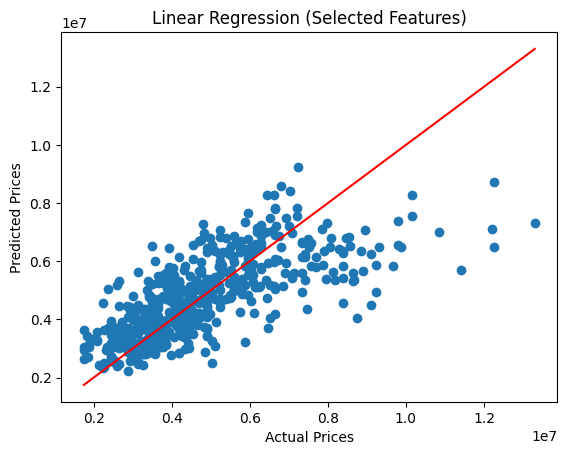

Mean Absolute Error (MAE): 942081.97
Mean Squared Error (MSE): 1681628847671.12
Root Mean Squared Error (RMSE): 1147761.34
R-squared coefficient (R2): 0.52


In [6]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X = data.drop('price', axis=1)  # Independent variables
y = data['price']   # Dependent variable

# Create X_selected DataFrame with the selected features
X_selected = X[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning', 'parking', 'prefarea','furnishingstatus']]


# Create the Linear Regression model
model = LinearRegression()

# Perform cross-validation and obtain the predicted values
predicted = cross_val_predict(model, X_selected, y, cv=10)

# Evaluate the model performance using cross_val_score
mae_scores = -cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
R2_score = r2_score(y, predicted)

# Compute the average of the evaluation metrics
mae = np.mean(mae_scores)
mse = np.mean(mse_scores)
rmse = np.mean(rmse_scores)

# Plot the scatter plot with the fitted line
plt.scatter(y, predicted)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Fitted line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression (Selected Features)')
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared coefficient (R2):", round(R2_score, 2))




The linear regression model on the selected features shows slightly worse performance compared to the linear regression model built using all features. The MAE of 942,081.97 indicates that, on average, the model's predictions deviate from the actual values by approximately 942,081.97. The RMSE of 1,147,761.34 indicates the average prediction error of the model is around 1,147,761.34. The R-squared coefficient of 0.52 suggests that approximately 52% of the variability in the target variable can be explained by the linear regression model on the selected features.

**2. Decision Tree Regression Model on selected features**

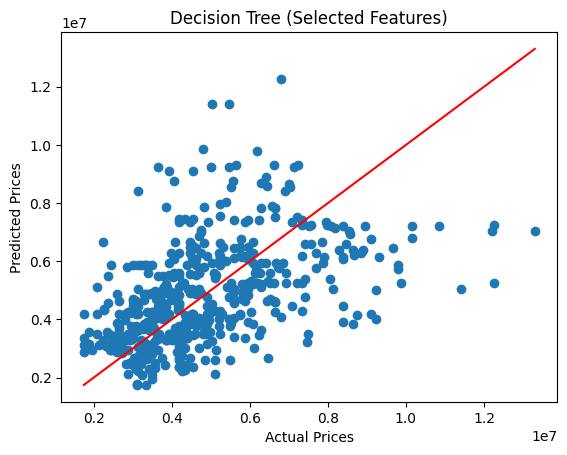

Mean Absolute Error (MAE): 1372178.81
Mean Squared Error (MSE): 3143291554058.99
Root Mean Squared Error (RMSE): 1682827.36
R-squared coefficient (R2): 0.07


In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X = data.drop('price', axis=1)  # Independent variables
y = data['price']   # Dependent variable

# Create X_selected DataFrame with the selected features
X_selected = X[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

# Create the Decision Tree Regression model
model = DecisionTreeRegressor()

# Perform cross-validation and obtain the predicted values
predicted = cross_val_predict(model, X_selected, y, cv=10)

# Evaluate the model performance using cross_val_score
mae_scores = -cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
R2_score = r2_score(y, predicted)

# Compute the average of the evaluation metrics
mae = np.mean(mae_scores)
mse = np.mean(mse_scores)
rmse = np.mean(rmse_scores)

# Plot the scatter plot with the fitted line
plt.scatter(y, predicted)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Fitted line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree (Selected Features)')
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared coefficient (R2):", round(R2_score, 2))


The decision tree model on the selected features shows similar performance as before, with high errors and low R-squared coefficient. The MAE and RMSE indicate larger errors compared to the linear regression models. The R-squared coefficient of 0.07 suggests that only approximately 7% of the variability in the target variable is explained by the decision tree model on the selected features.

**3. Random Forest Model on selected features**

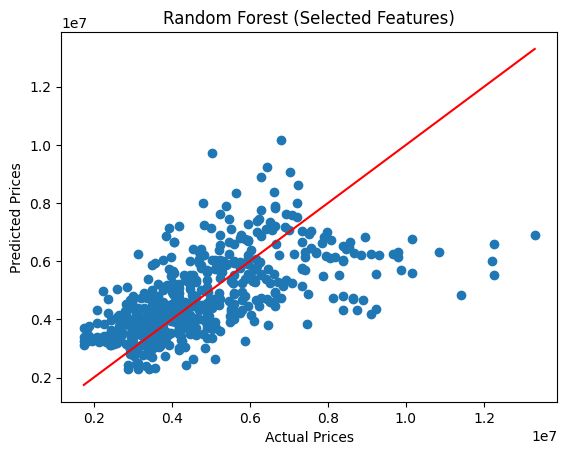

Mean Absolute Error (MAE): 1098408.98
Mean Squared Error (MSE): 2224709358122.0
Root Mean Squared Error (RMSE): 1317630.79
R-squared coefficient (R2): 0.35


In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


X = data.drop('price', axis=1)  # Independent variables
y = data['price']   # Dependent variable

# Create X_selected DataFrame with the selected features
X_selected = X[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

# Create the Decision Tree Regression model
model = RandomForestRegressor()

# Perform cross-validation and obtain the predicted values
predicted = cross_val_predict(model, X_selected, y, cv=10)

# Evaluate the model performance using cross_val_score
mae_scores = -cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
R2_score = r2_score(y, predicted)

# Compute the average of the evaluation metrics
mae = np.mean(mae_scores)
mse = np.mean(mse_scores)
rmse = np.mean(rmse_scores)

# Plot the scatter plot with the fitted line
plt.scatter(y, predicted)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Fitted line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest (Selected Features)')
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared coefficient (R2):", round(R2_score, 2))


The random forest model on the selected features performs similarly to the previous results obtained on all features. The R-squared coefficient of 0.35 suggests that approximately 35% of the variability in the target variable can be explained by the random forest model on the selected features.

when considering the selected features, the linear regression model still shows the best performance among the three models.

From the overall results obtained, the evaluation metrics for the selected features show higher values of MAE, MSE, and RMSE compared to the evaluation metrics for all features. This indicates that the model trained on all features performs better than the model trained on the selected features.

Based on the results, the Linear Regression model trained on all features exhibits the lowest prediction errors and deviations, making it the better choice for predicting housing prices among the three models considered. It provides a relatively accurate estimation of housing prices and recommended for this task.

The high MAE, MSE, and RMSE values are due to the larger scale of the target variable "price" (in millions), which results in larger errors in absolute and squared terms. However, it does not necessarily indicate poor model performance.






In [2]:
%%shell
jupyter nbconvert --to html Machine_Learning_Models.ipynb

[NbConvertApp] Converting notebook Machine_Learning_Models.ipynb to html
[NbConvertApp] Writing 958840 bytes to Machine_Learning_Models.html
